# CIFAR-Distributed-Backdoor
### TSNE for Feature Representations 

In [6]:
import numpy as np
import pickle
from sklearn.decomposition import PCA
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt

### Constants

In [7]:
model_type_arr = ['Backdoored', 'Clean']
colors_plotting = ['r', 'b']
labels_plotting = ['Translated', 'Clean'] 

In [8]:
class_names = {
 0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck'
}


### Loop to generate TSNE for feature representations

In [9]:
model_type_choice = 0
for targ_lbl in range(10):

    filename = "saved_pickles/feature-representations/"+ model_type_arr[model_type_choice] +"-Model-Feature-Representations/clean-image-feature-representations-class-" + str(targ_lbl) + ".pkl"
    with open(filename, 'rb') as handle:
        clean_image_feature_representations = pickle.load(handle)

    filename = "saved_pickles/feature-representations/"+ model_type_arr[model_type_choice] +"-Model-Feature-Representations/translated-image-feature-representations-class-" + str(targ_lbl) + ".pkl"
    with open(filename, 'rb') as handle:
        translated_image_feature_representations = pickle.load(handle)
    
    
    pca = PCA(n_components = 150)
    tsne = TSNE(n_components=2)

    X_arr = np.concatenate((clean_image_feature_representations, translated_image_feature_representations), 0)

    Y_arr = []
    for i in range(len(clean_image_feature_representations)):
        Y_arr.append(1)

    for i in range(len(translated_image_feature_representations)):
        Y_arr.append(0)

    X_arr_tsne = tsne.fit_transform(pca.fit_transform(X_arr))
    
    filename = "saved_pickles/2d-tsne-feature-representation/"+ model_type_arr[model_type_choice] +"-Model-Feature-Representations/feature-representations-tsne2d-class-" + str(targ_lbl) + ".pkl"
    with open(filename, 'wb') as handle:
        pickle.dump((X_arr_tsne, Y_arr), handle)

    print("Saved: ", filename)


Saved:  saved_pickles/2d-tsne-feature-representation/Backdoored-Model-Feature-Representations/feature-representations-tsne2d-class-0.pkl
Saved:  saved_pickles/2d-tsne-feature-representation/Backdoored-Model-Feature-Representations/feature-representations-tsne2d-class-1.pkl
Saved:  saved_pickles/2d-tsne-feature-representation/Backdoored-Model-Feature-Representations/feature-representations-tsne2d-class-2.pkl
Saved:  saved_pickles/2d-tsne-feature-representation/Backdoored-Model-Feature-Representations/feature-representations-tsne2d-class-3.pkl
Saved:  saved_pickles/2d-tsne-feature-representation/Backdoored-Model-Feature-Representations/feature-representations-tsne2d-class-4.pkl
Saved:  saved_pickles/2d-tsne-feature-representation/Backdoored-Model-Feature-Representations/feature-representations-tsne2d-class-5.pkl
Saved:  saved_pickles/2d-tsne-feature-representation/Backdoored-Model-Feature-Representations/feature-representations-tsne2d-class-6.pkl
Saved:  saved_pickles/2d-tsne-feature-rep

## Loop to view all t-SNE of the feature representations

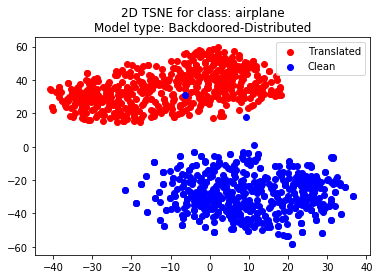

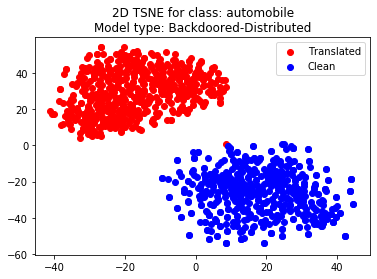

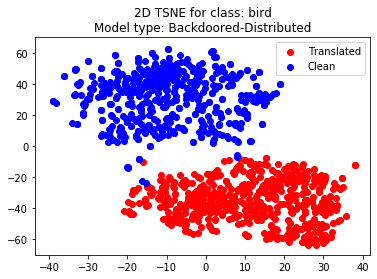

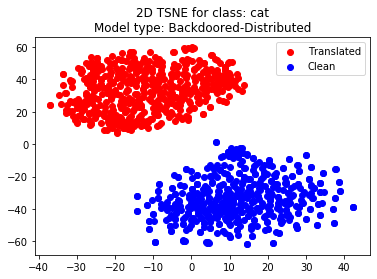

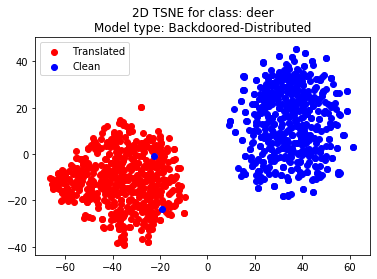

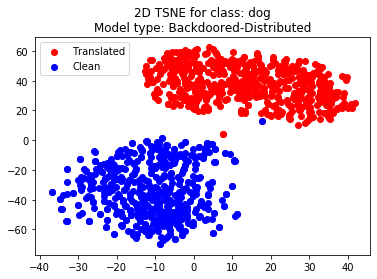

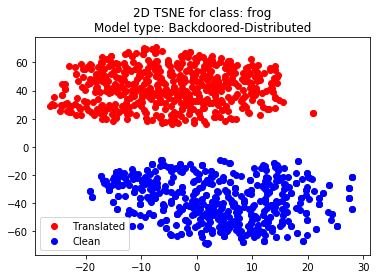

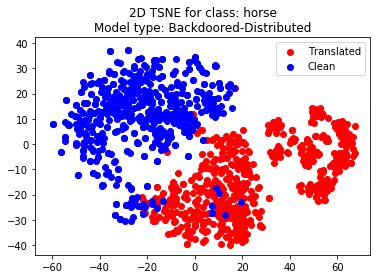

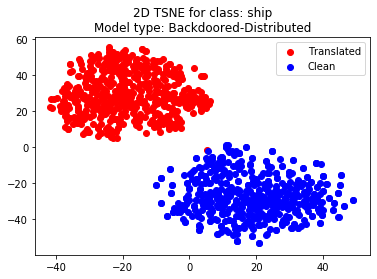

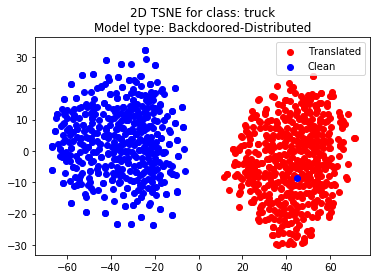

In [10]:
model_type_choice = 0

subtype = "-Distributed"

for targ_lbl in range(10):
    filename = "saved_pickles/2d-tsne-feature-representation/"+ model_type_arr[model_type_choice] +"-Model-Feature-Representations/feature-representations-tsne2d-class-" + str(targ_lbl) + ".pkl"
    with open(filename, 'rb') as handle:
        X_arr_tsne, Y_arr = pickle.load(handle)

    plt.title("2D TSNE for class: " + class_names[targ_lbl] + "\nModel type: "+  model_type_arr[model_type_choice] + subtype)
    
    X_clean_tsne = []
    Y_clean_tsne = []
    
    X_translated_tsne = [] 
    Y_translated_tsne = []
    
    for X, Y in zip(X_arr_tsne, Y_arr):
        if (Y == 0):
            X_translated_tsne.append(X)
            Y_translated_tsne.append(Y)
        
        if(Y == 1):
            X_clean_tsne.append(X)
            Y_clean_tsne.append(Y)
            
   
    plt.scatter(*zip(*X_translated_tsne), c = colors_plotting[Y_translated_tsne[0]], label=labels_plotting[Y_translated_tsne[0]])
    plt.scatter(*zip(*X_clean_tsne), c = colors_plotting[Y_clean_tsne[0]], label=labels_plotting[Y_clean_tsne[0]])

    plt.legend()
    plt.show()
    plt.close()